# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [1]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random
import warnings

/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/3649633269.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [2]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================

    for jdx, c in enumerate(classes):
        idx = np.where(labels == c)[0]
        prior[jdx] = np.sum(W[idx]) / np.sum(W[:])

    # ==========================

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for jdx, c in enumerate(classes):
        idx = np.where(labels == c)[0] # Vector of length C of indices for a given label class c
        xlc = X[idx,:] * W[idx] # Matrix  C x d with samples in the class c
        mu[jdx] = np.sum(xlc, axis=0)/np.sum(W[idx]) # Compute mean
        
    for jdx, c in enumerate(classes):
        idx = np.where(labels == c)[0] # Vector of length C of indices for a given label class c
        xlc = X[idx, :] # Matrix  C x d with samples in the class c
        diff = xlc - mu[jdx] # Matrix  C x d with diffs between x - µ
        diff = np.square(diff) * W[idx]
        mean = np.sum(diff, axis=0) / np.sum(W[idx])
        sigma[jdx] = np.diag(mean) # Use diagonal matrix for Naive Bayes Classier
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for jdx in range(Nclasses):
        diff = X - mu[jdx] # Matrix  C x d with diffs between x - µ
        lnSigma = - np.log(np.linalg.det(sigma[jdx])) / 2 # N vector
        lnPrior = np.log(prior[jdx]) # N vector
        for i in range(Npts):
            logProb[jdx][i] = lnSigma - np.inner(diff[i]/np.diag(sigma[jdx]), diff[i]) / 2 + lnPrior
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

## Assignment 1: ML Parameter Estimation for Bayesian Classification

- `mlParams(X, labels, W)` function:
1. mean(mu): the average of the feature values for each class, tells us where the data for class k is centered in the feature space
2. covariance(sigma): for each class, assuming independent features, tells us how spread out the data for class k is

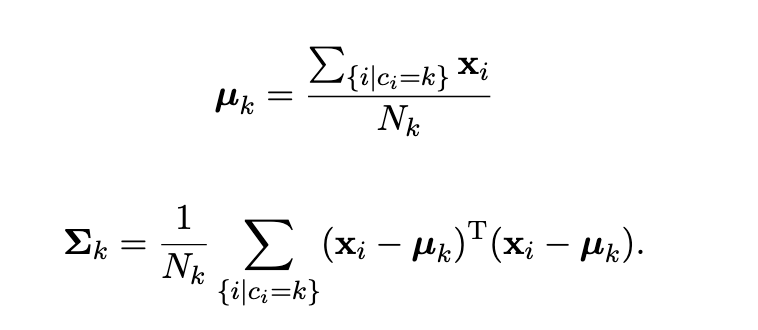

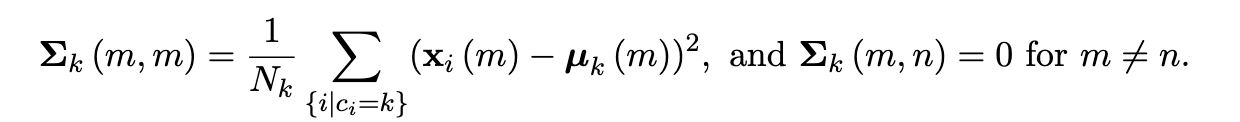

3. once we know mu and sigma for each class, we can compute the likelihood p(x|k) for any new data point x, without them, we cannot specify the guassian distributions and cannot do the classification under the naive bayes framework
4. the likelihood is essential for calculating the posterior probability p(k|x) in bayes' rule and ultimately classfying x to the most probable class

## Assignment 2: Bayesian Classifier

### `computePrior(labels, W)`
- Compute class priors using `computePrior(labels, W)`

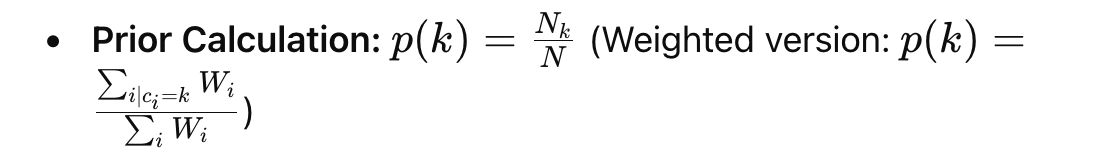

- objective: to see how common each class in general

### `classifyBayes`
1. compute the prior p(k) and the class-conditional density p(x|k), to get the posterior probability p(k|x) via bayes' rule

2. 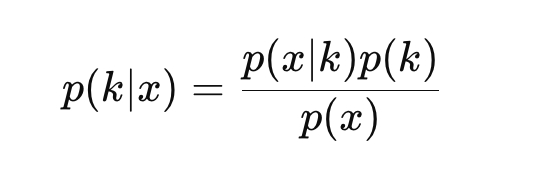

- because p(x) is the same for all classes for a given data point x, we simply compute:

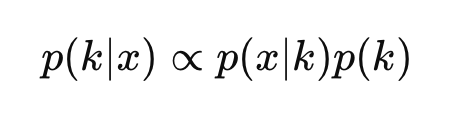

- this is why in `classifyBayes`, we compute log-probabilities:

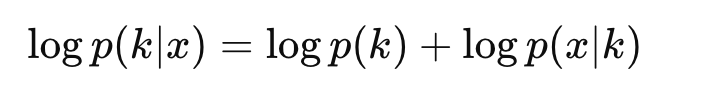

- objective: use those parameters to actually predict the class of new data

## Assignment 3: Testing Classifier

- Now we have the naive bayes classifier, computed priors and estimated parameters, we need to 
1. use `testClassifier` to measure classification accuracy on `Iris` and `Vowel` datasets.
2. analyze the classifier's strengths and weakness
3. visualize decision boundaries

In [3]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

The Naive Bayes assumption works well for independent features but struggles when features are correlated.

- Visualize decision boundaries using plotBoundary

Decision boundaries are linear due to diagonal covariance assumption.

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

A Bayes classifier is a probabilistic way to assign new points to one of these classes by maximizing the posterior probability. It would assigns points to the class whose Gaussian likelihood prior is largest.

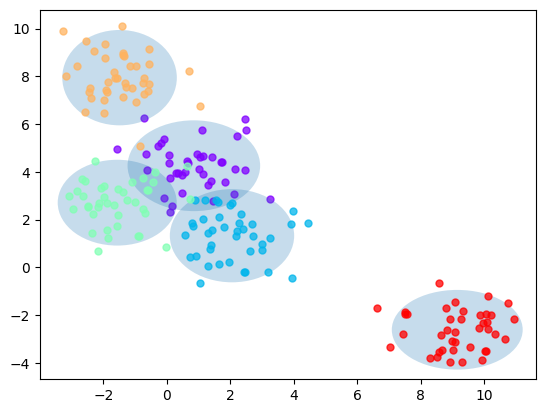

In [27]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [11]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)
warnings.filterwarnings('ignore')


Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

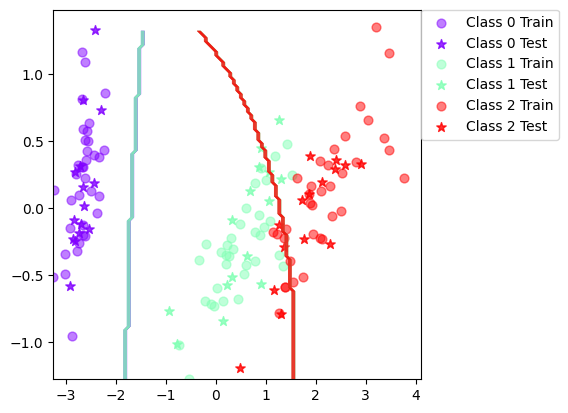

In [28]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)
warnings.filterwarnings('ignore')

- the linear-like boundaries are simple and more well-defined

In [14]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)
warnings.filterwarnings('ignore')

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

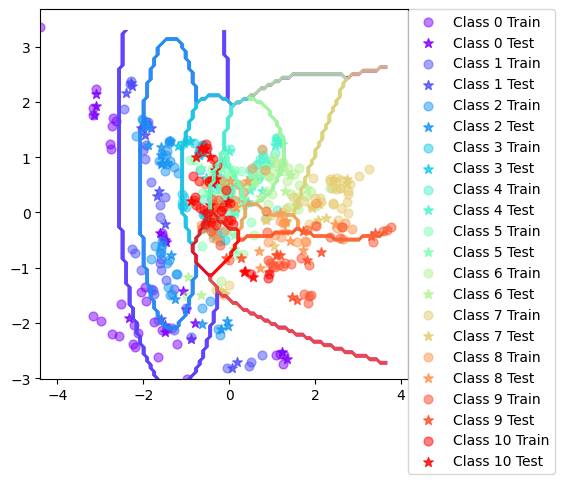

In [15]:
plotBoundary(BayesClassifier(), dataset='vowel')
warnings.filterwarnings('ignore')

- the decision boundaries are highly non-linear, showing some corelation between features

### Q1: When can a feature independence assumption be reasonable and when not?
- Bayes classifiers assume that the features are conditional independent with each other, given the class label. This simplifies calculations but is often an approximation rather than a strict reality.
1. if the features represent distinct, unrelated properties, their independence might be valid. even when features are mildly correlated, Naive bayes can still perform well (e.g. in `iris` dataset, their length and width features are somehow correlated)
3. when features are strongly correlated (e.g. `vowel` datasets) or feature dependencies are crucial to distinguishing classes, the assumption breaks and the NB will fail



### Q2: How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?
1. the decision boundary between class 0 and 1 is well defined and simple.
2. the class 1 and 2 have more overlap and more difficult to separate because of the dependency nature of NB that if the features are correlated, the assumption of independence in NB will cause incorrect boundaries, and some classes may be misclassified more often
- Improve:
1. switch to models that can learn feature dependencies such as SVM and decision trees or using Boosting which can improve weak classifiers by focusing on misclassified points
2. manipulate the data by using dimensionality reduction such as pca to make the dataset simpler or improve feature engineering

## Boosting functions to implement

The lab descriptions state what each function should do.

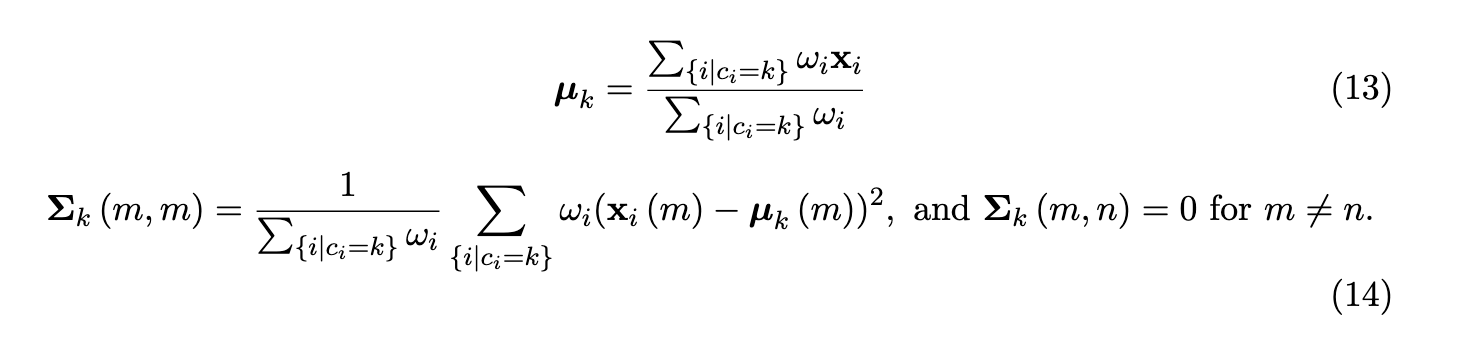

- boosting improves classification by focusing on hard-to-classify points and combining multiple models

- `trainBoost()`
1. train several weak classifiers
2. assign weights to the classifiers based on their performance

- `classifyBoost()`
1. combine predictions of all weak classifiers
2. final decision is based on the weighted majority vote

In [4]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        classes = np.unique(labels)

        # Compute error by classes to simplify operations
        eps = 0   
        for jdx in classes:
            idx = np.where(vote == jdx)[0]
            eps += np.sum(np.transpose(wCur[idx]) *  (1 - (jdx == labels[idx])))

        alpha = (np.log(1 - eps) - np.log(eps)) / 2 # Compute new alpha
        alphas.append(alpha) # you will need to append the new alpha

        # Update weights
        wOld = wCur
        for i in range(Npts):
            wCur[i] = wOld[i] * np.exp(alpha * (-1)**(vote[i]==labels[i]))
        wCur = wCur / np.sum(wCur)
        # alphas.append(alpha) # you will need to append the new alpha
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================

        for i in range(Ncomps):
            classified = classifiers[i].classify(X)
            for j in range(Npts):
                votes[j][classified[j]] += alphas[i]
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [5]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [18]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.1 with standard deviation 6.72


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

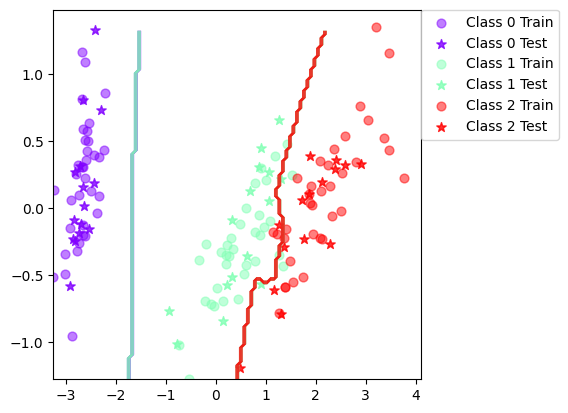

In [19]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

In [20]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

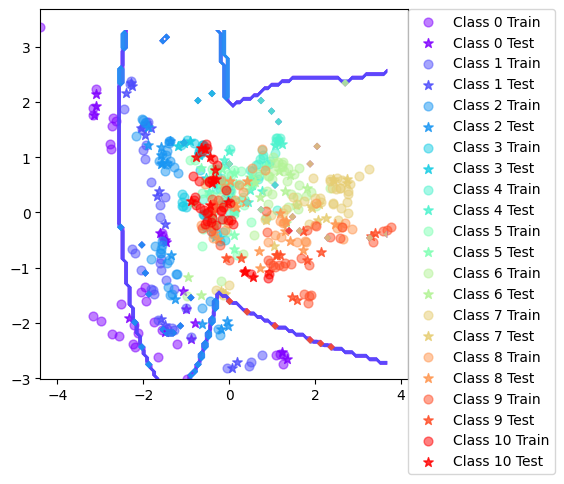

In [21]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='vowel',split=0.7)

### Q1: Is there any improvement in classification accuracy? Why/why not?
1. Yes, there is an improvement of the classification in both the iris and vowel datasets. Boosting focuses on the misclassified samples and build a more accurate model based on previous models 
2. but it also leads to high variance, so if the model is too complicated, it would leads to overfitting and reduce the accuracy



### Q2: Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
The boundary is more complex and fits better to the iris dataset

### Q3: Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?
1. Yes, boosting compensate for not using a complex model (e.g. Naive Bayes) but increase the accuracy, since it improve a weak model by reduce the bias and correct mistakes in misclassified points
2. but if the model is too simplied to fit the dataset, boosting cannot compensate for it, since the model cannot represent the patterns of the features

Now repeat the steps with a decision tree classifier.

In [6]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [7]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

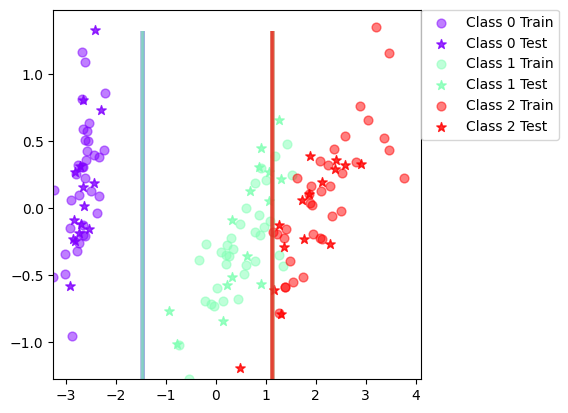

In [10]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

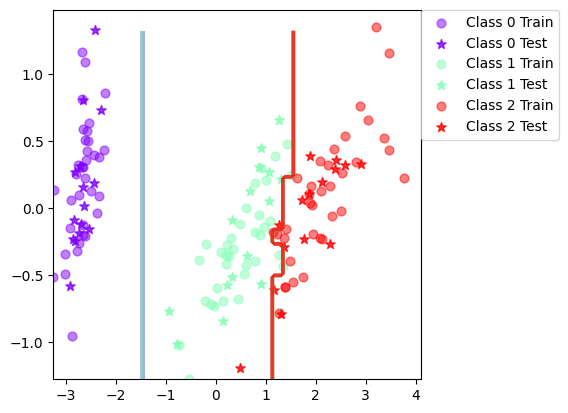

In [11]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

In [8]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [9]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 85.7
Trial: 20 Accuracy 87.7
Trial: 30 Accuracy 91.6
Trial: 40 Accuracy 85.1
Trial: 50 Accuracy 79.2
Trial: 60 Accuracy 89
Trial: 70 Accuracy 86.4
Trial: 80 Accuracy 88.3
Trial: 90 Accuracy 89
Final mean classification accuracy  86.4 with standard deviation 3.12


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/xueyao.wang/Library/CloudStorage/OneDrive-KarolinskaInstitutet/Mac/Documents/course/2025_spring/DD3431_Machine_learning_KTH/lab3py/labfuns.py:252: UserWarning: No contour levels were found within the data range.
  CS = plt.contour(xRange,yRange,(grid==c).astype(float),15,linewidths=0.25,colors=conv.to_rgba_array(color))
*c* argument looks like a single nume

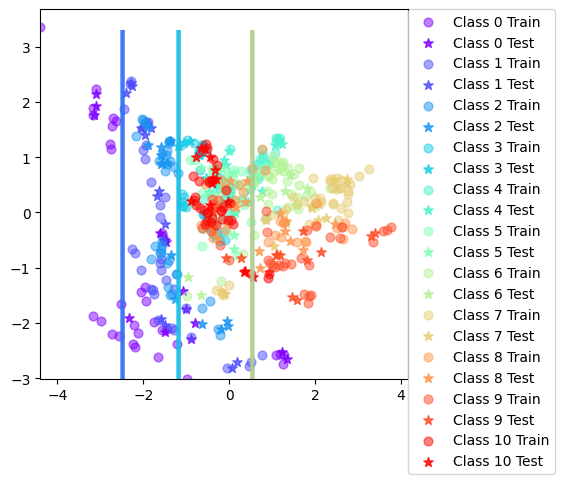

In [12]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='vowel',split=0.7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

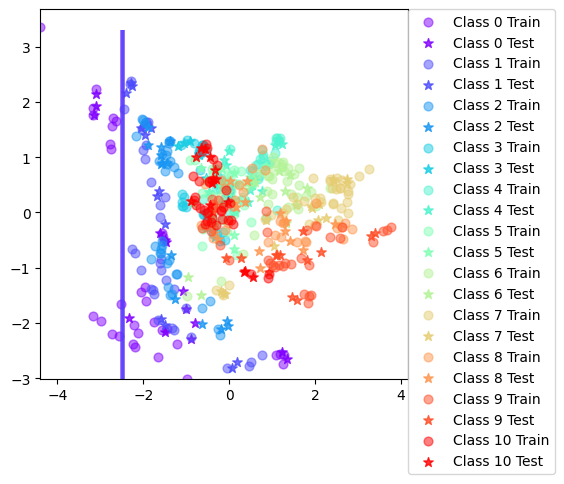

In [13]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

### Q1: Is there any improvement in classification accuracy? Why/why not?
Yes, boosting improve the accuracy of just using the normal decision tree. single decision tree is a weak classifier but we can get better decision tree based on multiple weak decision trees. 

### Q2: Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
the boundary fits better to the dataset in the boosted classifier. It is more complex in this case

### Q3: Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?
Yes, similar to using bayes classifier

## **assignment7: If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:**

- **Outliers**
1. Naive Bayes can be affect to certain points since it estimates means and variances. 
2. `Decision tree` can handle outliers better since it didn't split the data based on mean/variance
3. Boosting could include outliers since it tends to focus more on misclassified points, so it leads to overfitting

- **Irrelevant Inputs**
1. Naive Bayes can be affect to certain points since the extra feature can degrade performance because of the noise
2. `Decision tree` wouldn't split on the irrelevant features if they cannot help to reduce impurity. So it would discard and ignore the irrelevant variables
3. Boosting can focus on small patterns and lead to overfitting

- **Predictive Power**
Generally `boosted decision trees `can perform the best because the naive bayes is weaker and boosting can increas the accuracy

- **Mixed Data Types**
1. Naive Bayes suffers if there are mix data types and may need separate handling or tranformation since it assumes that features satisfy gaussian distribution
2. `Decision tree` handls mix data type naturally
3. `boosted decision tree` improves it

- **Scalability (the dimension of the data, D, is large or the number of instances,
N , is large, or both)**
1. `Naive Bayes` is the fastest and simplest approach in large datasets since it only consider mean and variances
2. Decision tree would be very expensive to train if the dataset is very large and suffer from the high dimensions
3. boosted decision tree is worse in this case





## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [7]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)
warnings.filterwarnings('ignore')

/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):


Trial: 0 Accuracy 88.3


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 10 Accuracy 90.8


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 20 Accuracy 85


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 30 Accuracy 89.2


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 40 Accuracy 89.2


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 50 Accuracy 84.2


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 60 Accuracy 91.7


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 70 Accuracy 82.5


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 80 Accuracy 81.7


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Trial: 90 Accuracy 86.7


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):
/var/folders/lr/

Final mean classification accuracy  87.7 with standard deviation 3.03


/var/folders/lr/fftw1jxj47vcnw8670p8yydw0000gq/T/ipykernel_34147/4005616124.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(Npts):


- Final mean classification accuracy  87.7 with standard deviation 3.03

In [8]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 76.7
Trial: 10 Accuracy 77.5
Trial: 20 Accuracy 80
Trial: 30 Accuracy 75
Trial: 40 Accuracy 73.3
Trial: 50 Accuracy 65
Trial: 60 Accuracy 76.7
Trial: 70 Accuracy 77.5
Trial: 80 Accuracy 56.7
Trial: 90 Accuracy 72.5
Final mean classification accuracy  71.6 with standard deviation 6.28


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

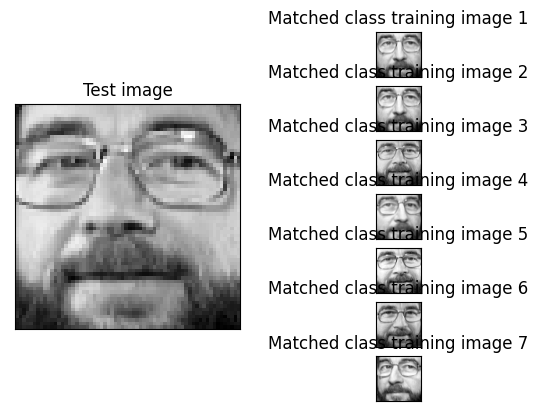

In [10]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])

- normalize the data between 0 and 1
- using pca for dimensionality reduction
- train adaboost for decision tree
- finally recognize the accurate face!!!